# Logistic Regression Lab 

**Objectives**:
1. Perform a train-test split on data.
1. Evaluate four multi-variable logistic regression models using accuracy
and a confusion matrix.
1. Predict the lifestyle of a user based on body features

Additionally, you will be asked to consider overfitting and underfitting
of the models based upon these results.

In [0]:
%run /Classroom-Setup

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[2]: DataFrame[]

## Load the Data
The `Includes/Classroom-Setup` notebook has made an aggregate table of data
available to us via the Metastore associated with our workspace. We can load
the data as a pandas dataframe using the cell below.

This command loads the table using the Metastore reference. The `.toPandas()`
method converts the Spark DataFrame to a Pandas DataFrame. We will use the
Pandas DataFrame with Scikit-Learn throughout this Module.

In [0]:
from pyspark.sql.functions import *
ht_agg_spark_df = spark.read.table("ht_daily_metrics")
ht_agg_pandas_df =(ht_agg_spark_df.groupBy('device_id')
                  .agg(round(mean(col('bmi')),2).alias('mean_bmi'),
                  round(mean(col('vo2')),2).alias('mean_vo2'),
                  round(mean(col('resting_heartrate')),2).alias('mean_resting_heartrate'),
                  round(mean(col('active_heartrate')),2).alias('mean_active_heartrate'))).toPandas()

Join the features table with the target table

In [0]:
users_table=spark.read.table('ht_users').toPandas()
device_lifestyle=users_table[['device_id','lifestyle']]
ht_agg_pandas_df=ht_agg_pandas_df.merge(device_lifestyle,'inner','device_id')
ht_agg_pandas_df

,device_id,mean_bmi,mean_vo2,mean_resting_heartrate,mean_active_heartrate,lifestyle
0,fce425f2-e48a-11ea-8204-0242ac110002,25.97,30.31,73.85,141.77,Weight Trainer
1,fd2073e0-e48a-11ea-8204-0242ac110002,28.66,26.33,66.65,147.19,Sedentary
2,d5b6536a-e48a-11ea-8204-0242ac110002,28.07,30.51,61.54,115.35,Cardio Enthusiast
3,d62d31e2-e48a-11ea-8204-0242ac110002,24.27,33.01,60.13,109.56,Cardio Enthusiast
4,d72e7fc4-e48a-11ea-8204-0242ac110002,26.14,33.62,57.68,107.35,Athlete
...,...,...,...,...,...,...
2995,e3c983d2-e48a-11ea-8204-0242ac110002,11.45,29.64,54.83,108.92,Cardio Enthusiast
2996,e4c361fe-e48a-11ea-8204-0242ac110002,13.26,31.38,54.00,104.65,Cardio Enthusiast
2997,f2823310-e48a-11ea-8204-0242ac110002,26.77,27.36,71.08,129.59,Weight Trainer
2998,f81b5036-e48a-11ea-8204-0242ac110002,32.22,32.36,60.81,119.73,Weight Trainer


## Prepare one Datasets and Target

Next, we will prepare four subsets of our, used as in the previous lab
to build four different logistic regression models.

We also prepare our target vector, `y`.

In [0]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X_1 = ht_agg_pandas_df[['mean_active_heartrate', 'mean_bmi', 'mean_vo2', 'mean_resting_heartrate']]

le = LabelEncoder()
lifestyle = ht_agg_pandas_df['lifestyle']
le.fit(lifestyle)
#Encod the target
y = le.transform(lifestyle)
#See the respective encoded numbers with respective categorical values.
lifestyle=pd.concat([lifestyle,pd.Series(y).rename('lifestyle_encod')],axis=1)
lifestyle

,lifestyle,lifestyle_encod
0,Weight Trainer,3
1,Sedentary,2
2,Cardio Enthusiast,1
3,Cardio Enthusiast,1
4,Athlete,0
...,...,...
2995,Cardio Enthusiast,1
2996,Cardio Enthusiast,1
2997,Weight Trainer,3
2998,Weight Trainer,3


## Framing a Business Problem

**NOTE:** This is repeated from a previous lab.

Over the next few labs, we will use supervised machine learning
to answer a new business question:

> Given a users fitness profile, can we predict the lifestyle of a user?

Like the regression problem we previously solved,
our **inputs** will be fitness profile information. This is, however, a classification
problem and will have a different **output**, lifestyle.

## Perform the Train-Test Split

Next, we will split one of our four subsets of feature data and our target data
into training and testing data.

In [0]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y,test_size=0.2,random_state=42)

## Exercise 2: One-Variable Logistic Regression

Fit one multiple-variable logistic models, one for each datasubset.

In [0]:
# TODO
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression(max_iter=10000)

lr_1.fit(X_1_train,y_train)


Out[9]: LogisticRegression(max_iter=10000)

## Evaluate a Multi-variable Model using accuracy and a confusion matrix

Finally, we evaulate our models. We do so using the accuracy metric and a confusion matrix.

To use these metrics, we need to
1. generate a vector of precictions using `estimator.predict()`
1. pass actual and predicted values to the metric as `metric(actual, predicted)`
1. do this for both the training and testing data

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_1_predicted = lr_1.predict(X_1_train)
y_test_1_predicted = lr_1.predict(X_1_test)

print("training accuracy: ", accuracy_score(y_train, y_train_1_predicted))
print("test accuracy:     ", accuracy_score(y_test, y_test_1_predicted))
print("training confusion matrix")
print(confusion_matrix(y_train, y_train_1_predicted))
print("")
print("test confusion matrix")
print(confusion_matrix(y_test, y_test_1_predicted))

training accuracy:  0.5975
test accuracy:      0.625
training confusion matrix
[[335 257   0 100]
 [190 655   0   0]
 [  2   0  62 189]
 [164   6  58 382]]

test confusion matrix
[[ 87  60   0  20]
 [ 39 180   0   0]
 [  0   0  12  47]
 [ 41   1  17  96]]


Out[12]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f2f32038100>

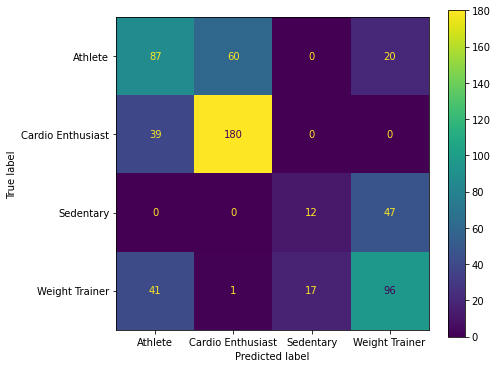

In [0]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
cm=confusion_matrix(y_test, y_test_1_predicted)
cmd = ConfusionMatrixDisplay(cm,display_labels=np.array(['Athlete','Cardio Enthusiast','Sedentary','Weight Trainer']).T)
fig, ax = plt.subplots(figsize=(7,6))
cmd.plot(ax=ax)